In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [42]:
df = pd.read_csv("bank.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/> 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/> 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 


   ## Input variables:

<ul> 
    <li>1 - age (numeric)</li>
    <li>2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                        "blue-collar","self-employed","retired","technician","services") </li>
    <li>3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</li>
    <li>4 - education (categorical: "unknown","secondary","primary","tertiary")</li>
    <li>5 - default: has credit in default? (binary: "yes","no")</li>
    <li>6 - balance: average yearly balance, in euros (numeric) </li>
    <li>7 - housing: has housing loan? (binary: "yes","no")</li>
    <li>8 - loan: has personal loan? (binary: "yes","no")</li>
   <li>9 - contact: contact communication type (categorical: "unknown","telephone","cellular") </li>
   <li>10 - day: last contact day of the month (numeric)</li>
   <li>11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")</li>
   <li>12 - duration: last contact duration, in seconds (numeric) </li>
   <li>13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li>
   <li>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not     previously contacted)</li>
   <li>15 - previous: number of contacts performed before this campaign and for this client (numeric)</li>
   <li>16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</li>
   <li>17 - y - has the client subscribed a term deposit? (binary: "yes","no")</li>
</ul>

# EDA

In [43]:
df.shape

(45211, 17)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Note: There are no missing values in the dataset

In [46]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Note: The numerical features have various scales. Then, they must be scaled.

In [47]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

### Note: Some columns are binary: default, loan, and housing. Also, some columns are categorical: job, education, contact, month, and poutcome.
### For training the classifiers it must convert the binary and categorical columns into numerical nature.

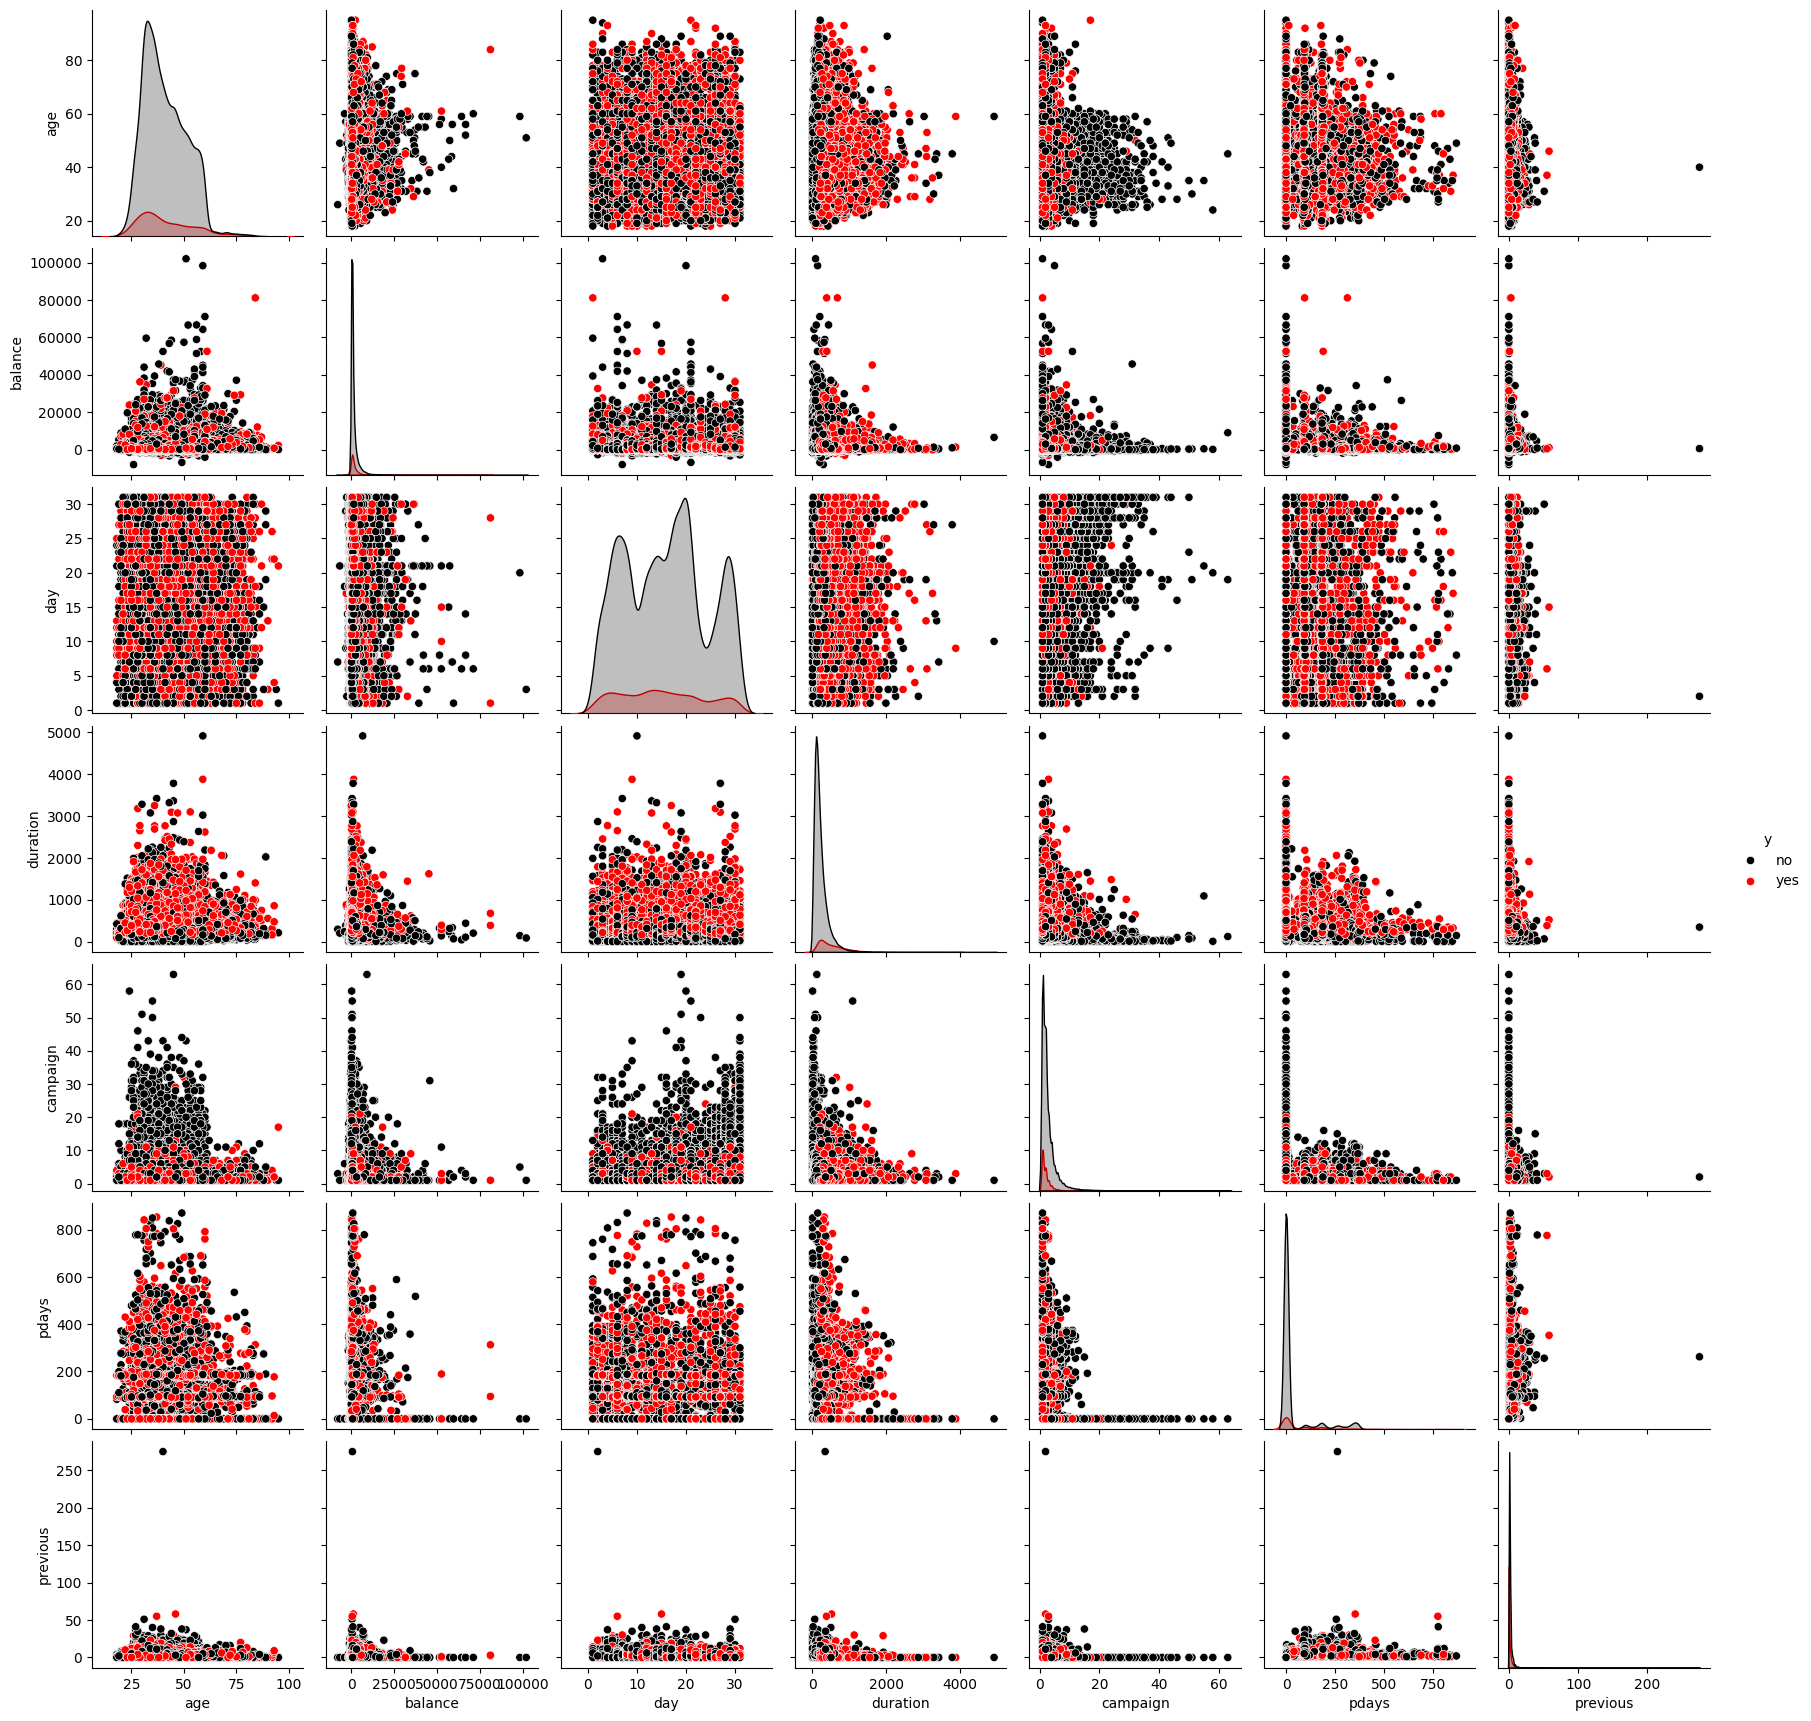

In [53]:
sns.pairplot(data = df, hue = 'y', palette=['k', 'red'])

### Note: According to the scatter plots of each numerical feature, it can be shown that most features can not be split into two classes. As a result, it must be applied the algorithms with the nonlinear kernel.

### In the following, the correlation of numerical features will be checked with the target.

In [57]:
for num_feature in list(df.select_dtypes(include=['number','int64'])):
 num_grouplist = df.groupby('y')[num_feature].apply(list)
 result = f_oneway(*num_grouplist)
 print('P-value for', num_feature, 'is: ', result[1])

P-value for age is:  8.825643691900577e-08
P-value for balance is:  2.5211136918594683e-29
P-value for day is:  1.6538801608077923e-09
P-value for duration is:  0.0
P-value for campaign is:  1.0123473642068786e-54
P-value for pdays is:  3.79055331945749e-108
P-value for previous is:  7.801830349772383e-88


### Note: as the outputs of the P-value are almost zero, then, H₀ was rejected. This means all the numerical features are correlated with the target.

### Also, for checking the correlation between the categorical features and the target, it has been used the chi2_contingency function:

In [50]:
# Cross tabulation between target and categorical features
for cat_feature in list(df.select_dtypes(include=['category','object'])):
    CrosstabResult=pd.crosstab(index=df['y'],columns=df[cat_feature])
    print(CrosstabResult)

# importing the required function
    from scipy.stats import chi2_contingency

# Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value to be 0, then only we do not accept the assumption(H0)

    print('The P-Value of the ChiSq Test for','cat_feature', 'is: ', ChiSqResult[1])

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     4540         9024          1364       1131        8157     1748   
yes     631          708           123        109        1301      516   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1392      3785      669        6757        1101      254  
yes            187       369      269         840         202       34  
The P-Value of the ChiSq Test for cat_feature is:  3.337121944935502e-172
marital  divorced  married  single
y                                 
no           4585    24459   10878
yes           622     2755    1912
The P-Value of the ChiSq Test for cat_feature is:  2.1450999986791486e-43
education  primary  secondary  tertiary  unknown
y                                               
no            6260      2

### Note: As can be shown, for the categorical features the P-value came close to zero. Hence H0 will be not accepted. Which means the categorical features are correlated with the target.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

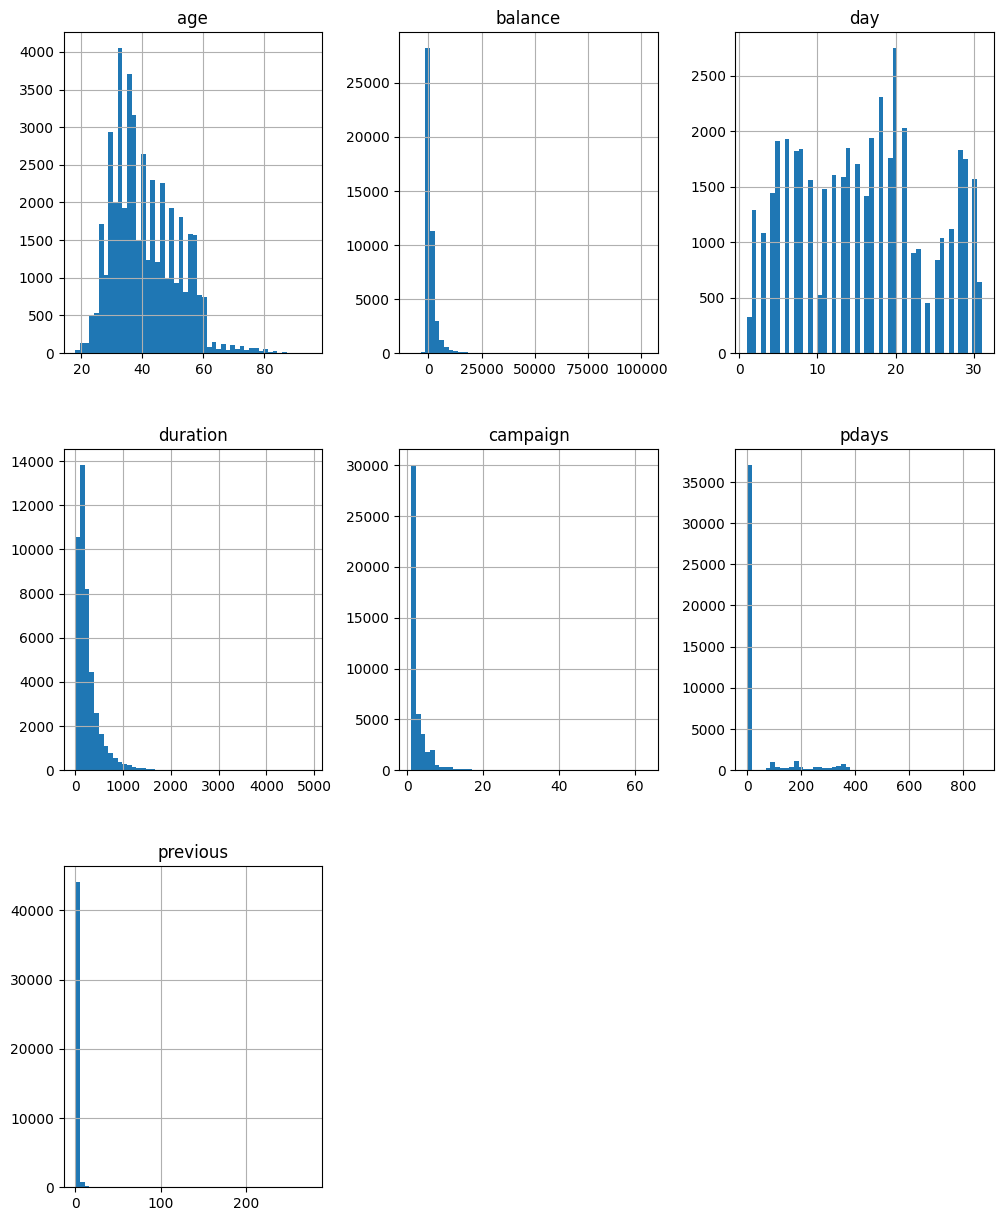

In [58]:
df.hist(bins=50, figsize=(12, 15))

### The density of the categorical features and the target:

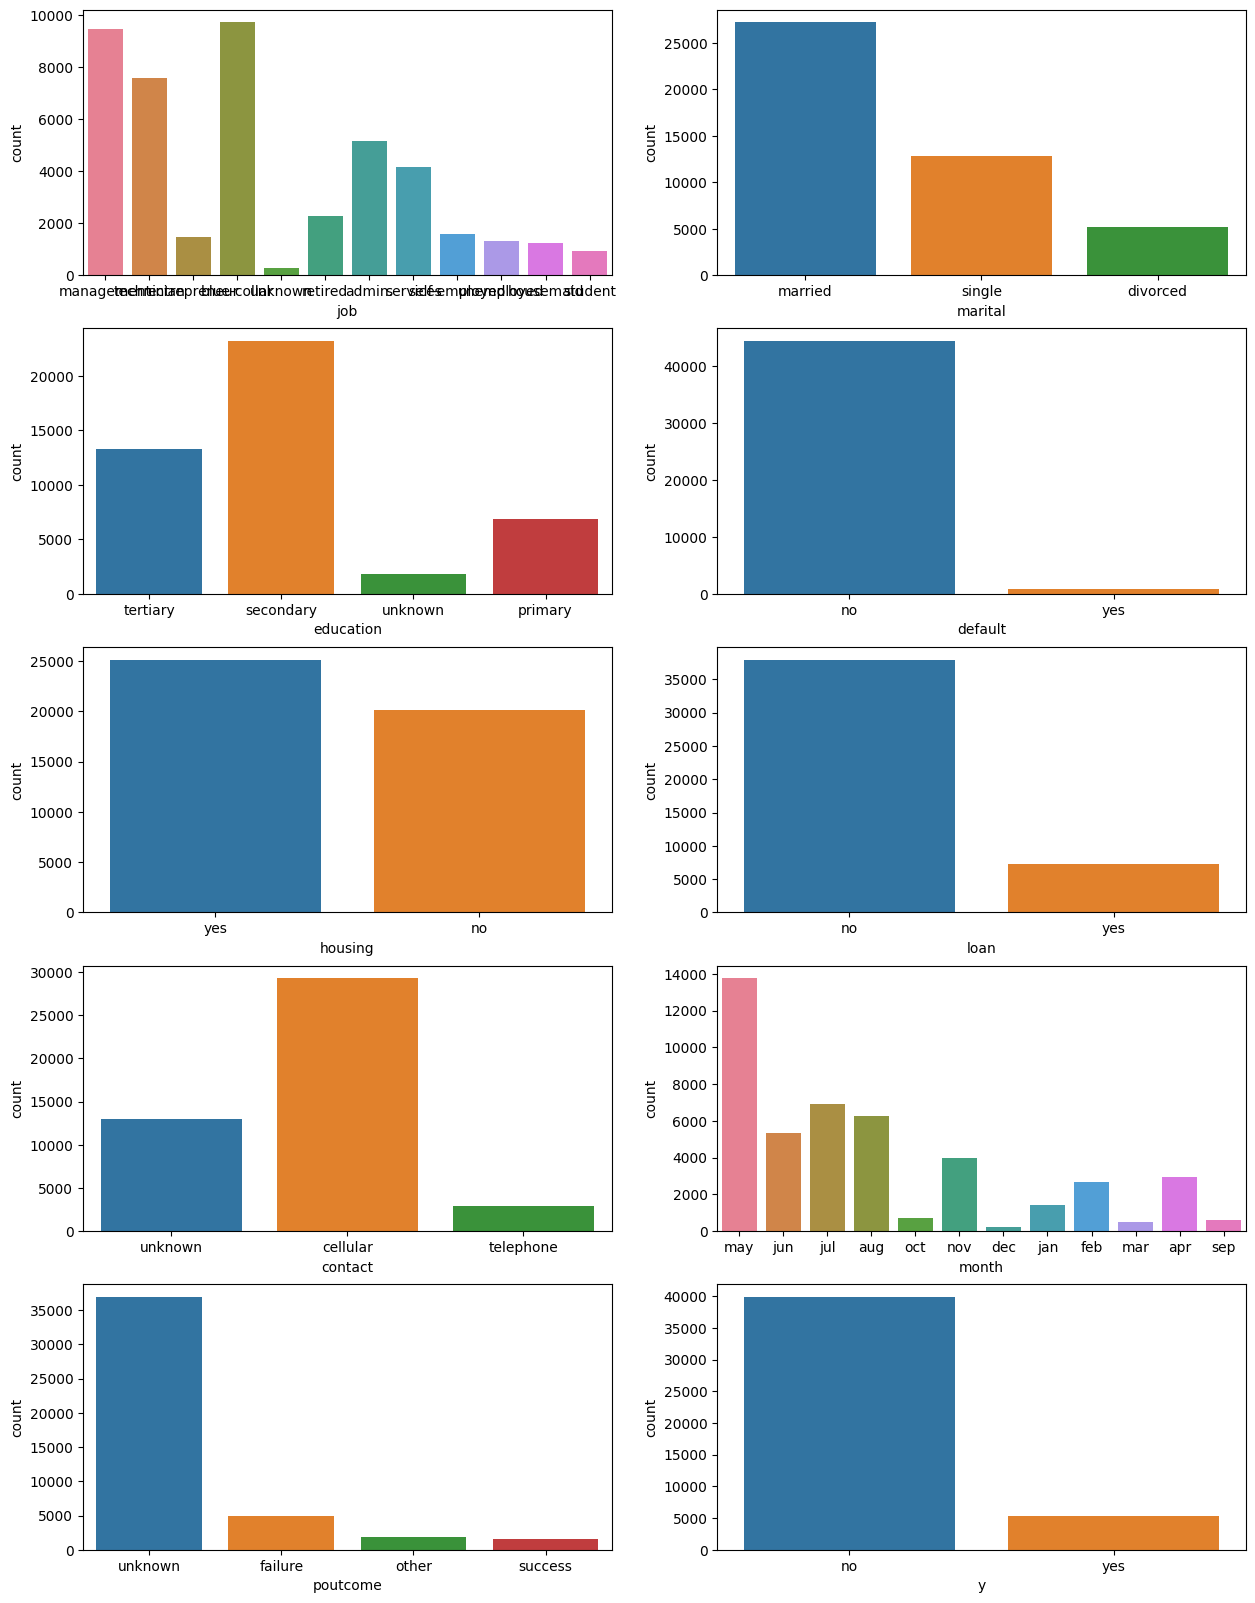

In [67]:
fig, axes = plt.subplots(5,2, figsize = (15, 20))
axe = axes.ravel()
for i, cat_feature in enumerate(list(df.select_dtypes(include=['category','object']))):
    sns.countplot(x = cat_feature, data = df, hue = cat_feature, ax=axe[i])
    axe[i].set_ylabel('count')

### Checking the balance of data proportion:
### According to the target (y) density plot, the dataset is unbalanced.
### The proportion of the data is 8:1. There isn't a universally agreed-upon threshold for when a dataset is considered imbalanced. However, a common rule of thumb is that if the minority class in your dataset constitutes less than 10-20% of your total data, it can be considered imbalanced.

# Import necessary libraries from sklearn

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Extract the features and target from the raw dataset

In [5]:
features = df.drop('y', axis = 1)
target = df['y'].apply(lambda r: 1 if r == 'yes' else 0)

# Split the train and test dataset

In [6]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocessing the features on the pipeline

In [7]:
numeric_features = list(features.select_dtypes(include=['number','int64']))
numeric_transformer = Pipeline(
                      steps=[('scaler', StandardScaler())])

In [8]:
categorical_features = list(features.select_dtypes(include=['category','object']))
categorical_transformer = Pipeline(
                          steps=[("encoder", OneHotEncoder(sparse_output=False).set_output(transform="pandas"))])

In [9]:
preprocessor = ColumnTransformer([
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [10]:
features_train_prepared = preprocessor.fit_transform(features_train)

# Create instances from algorithm classes

In [11]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
rnd_clf = RandomForestClassifier(n_estimators = 10)
svm_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()

### Note: In this section, the stacking model has been built from Logistic Regression, Decision Tree, support vector machine, and KNeighbors in the first layer and for the last layer, the Random Forest. 
### Note: Because the features can not be split into two classes in linear mode, the selected kernel of the estimator can not be linear.

In [20]:
stacking_model = StackingClassifier(
    estimators=[
        ('lgr', log_clf),
        ('dt', dt_clf),
        ('svc', svm_clf),
        ('knn', knn_clf)
        ],
    final_estimator=rnd_clf)
stacking_model.fit(features_train_prepared, target_train)

StackingClassifier(estimators=[('lgr', LogisticRegression(max_iter=10000)),
                               ('dt', DecisionTreeClassifier()), ('svc', SVC()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(n_estimators=10))

# Metrics of the stacking model

In [21]:
features_test_prepared = preprocessor.transform(features_test)
y_pred_stacking = stacking_model.predict(features_test_prepared)
print(accuracy_score(target_test, y_pred_stacking))
print(classification_report(target_test, y_pred_stacking))
print(confusion_matrix(target_test, y_pred_stacking))

0.8929558774742895
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.58      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043

[[7635  317]
 [ 651  440]]


### Note: All the classifiers that have been used in stacking mode, in the following will be trained in individual states.

In [19]:
for clf in (log_clf, rnd_clf, svm_clf, knn_clf, dt_clf):
    clf.fit(features_train_prepared, target_train)
    y_pred = clf.predict(features_test_prepared)
    print(clf.__class__.__name__, accuracy_score(target_test, y_pred))
    print(classification_report(target_test, y_pred))
    print(confusion_matrix(target_test, y_pred))

LogisticRegression 0.8988167643481145
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

[[7755  197]
 [ 718  373]]
RandomForestClassifier 0.8974897710936636
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.35      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

[[7730  222]
 [ 705  386]]
SVC 0.9026871613402632
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.69      0.36      0.47      1091

    accuracy             

# Gridsearchcv
### Note: In this section, the goal is to optimize the hyperparameters of the estimators. In the following, the optimized hyperparameters will be fed to the stacking model.

In [22]:
stacking_model.get_params()

{'cv': None,
 'estimators': [('lgr', LogisticRegression(max_iter=10000)),
  ('dt', DecisionTreeClassifier()),
  ('svc', SVC()),
  ('knn', KNeighborsClassifier())],
 'final_estimator__bootstrap': True,
 'final_estimator__ccp_alpha': 0.0,
 'final_estimator__class_weight': None,
 'final_estimator__criterion': 'gini',
 'final_estimator__max_depth': None,
 'final_estimator__max_features': 'sqrt',
 'final_estimator__max_leaf_nodes': None,
 'final_estimator__max_samples': None,
 'final_estimator__min_impurity_decrease': 0.0,
 'final_estimator__min_samples_leaf': 1,
 'final_estimator__min_samples_split': 2,
 'final_estimator__min_weight_fraction_leaf': 0.0,
 'final_estimator__n_estimators': 10,
 'final_estimator__n_jobs': None,
 'final_estimator__oob_score': False,
 'final_estimator__random_state': None,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': RandomForestClassifier(n_estimators=10),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'au

In [23]:
params = {'dt__max_depth': [2,3], "final_estimator__n_estimators": [10, 50, 100], "lgr__max_iter": [10000, 15000], "svc__kernel": ['rbf', 'sigmoid'], "knn__n_neighbors": [3, 5, 10]}
grid = GridSearchCV(estimator=stacking_model, param_grid=params, cv=3)
grid.fit(features_train_prepared, target_train)

GridSearchCV(cv=3,
             estimator=StackingClassifier(estimators=[('lgr',
                                                       LogisticRegression(max_iter=10000)),
                                                      ('dt',
                                                       DecisionTreeClassifier()),
                                                      ('svc', SVC()),
                                                      ('knn',
                                                       KNeighborsClassifier())],
                                          final_estimator=RandomForestClassifier(n_estimators=10)),
             param_grid={'dt__max_depth': [2, 3],
                         'final_estimator__n_estimators': [10, 50, 100],
                         'knn__n_neighbors': [3, 5, 10],
                         'lgr__max_iter': [10000, 15000],
                         'svc__kernel': ['rbf', 'sigmoid']})

In [25]:
grid.best_params_

{'dt__max_depth': 3,
 'final_estimator__n_estimators': 100,
 'knn__n_neighbors': 10,
 'lgr__max_iter': 15000,
 'svc__kernel': 'rbf'}

# Metrics of the stacking model by the optimized hyperparameters

In [40]:
print(accuracy_score(grid.best_estimator_.predict(features_test_prepared), target_test))
print(classification_report(grid.best_estimator_.predict(features_test_prepared), target_test))
print(confusion_matrix(grid.best_estimator_.predict(features_test_prepared), target_test))

0.8993696782041358
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8250
           1       0.45      0.61      0.52       793

    accuracy                           0.90      9043
   macro avg       0.70      0.77      0.73      9043
weighted avg       0.92      0.90      0.91      9043

[[7646  604]
 [ 306  487]]


### Note: After the optimization of some of the hyperparameters of the estimators, the model metrics are calculated. Then the results are compared without optimization. As can be shown, the result change is close to zero. The reason can be the unbalanced dataset. maybe...